In [97]:
import seaborn as sea
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, tree, neighbors, neural_network
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [98]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



In [99]:
train_data.head()
test_data.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
train_data.columns[train_data.isna().any()].tolist()



['Age', 'Cabin', 'Embarked']

In [101]:

data = [test_data, train_data]

for train_data in data:
    train_data.drop(columns=['Ticket', 'Cabin'], inplace=True)
    train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)


    train_data['Alone'] = 1
    train_data['Alone'].loc[train_data['Parch'] + train_data['SibSp'] > 1] = 0

    train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(
    ), 'Embarked': train_data['Embarked'].mode()[0]}

    train_data.fillna(value=train_nan_map, inplace=True)

    # columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2},
    #                'Sex': {'male': 0, 'female': 1}}
    # train_data.replace(columns_map, inplace=True)

    train_data['Title'] = train_data['Name'].str.split(
        ", ", expand=True)[1].str.split(".", expand=True)[0]
    train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
    train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
    train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
    
    stat_min = 10
    title_names = (train_data['Title'].value_counts() < stat_min)

    train_data['Title'] = train_data['Title'].apply(
        lambda x: 'Misc' if title_names.loc[x] == True else x)

    encoder = LabelEncoder()
    encode = ['Embarked', 'Sex', 'Title']
    for col in encode:
        train_data[col] = encoder.fit_transform(train_data[col])

X_train = train_data.loc[:, train_data.columns != 'Survived']
X_train = X_train.loc[:, X_train.columns != 'Name']

y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.20, random_state=10)


/home/hemang/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [102]:
print(X_train.groupby(['Title']).count())
print(y_train.head())
print(test_data.head())


       Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Alone
Title                                                       
0          28   28   28     28     28    28        28     28
1          19   19   19     19     19    19        19     19
2         153  153  153    153    153   153       153    153
3         410  410  410    410    410   410       410    410
4         102  102  102    102    102   102       102    102
PassengerId
58     0
718    1
432    1
634    0
164    0
Name: Survived, dtype: int64
             Pclass                                          Name  Sex   Age  \
PassengerId                                                                    
892               3                              Kelly, Mr. James    1  34.5   
893               3              Wilkes, Mrs. James (Ellen Needs)    0  47.0   
894               2                     Myles, Mr. Thomas Francis    1  62.0   
895               3                              Wirz, Mr. Albert    1  27.0   
896    

In [0]:

pp = sea.pairplot(train_data, hue='Survived', palette='deep', size=1.2,
                  diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])


In [67]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))



0.8100558659217877


In [8]:
knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))



0.7186440677966102


In [103]:
NN_clf = neural_network.MLPClassifier()
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))
y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values




0.8379888268156425


/home/hemang/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
# svm_clf = svm.SVC(kernel='linear', verbose=True)
# svm_clf.fit(X_train.values, y_train.values)
# print(svm_clf.score(X_test.values, y_test.values))
# y_pred = svm_clf.predict(X_test.values)
# y_truth = y_test.values




(596, 9)

In [104]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train.values, y_train.values)
print(random_forest.score(X_test.values, y_test.values))

0.8268156424581006


In [89]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.256
Age,0.236
Sex,0.189
Title,0.102
Pclass,0.082
SibSp,0.058
Embarked,0.037
Parch,0.030
Alone,0.012


In [105]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)
print ("False Positive rate", fp/(fp+tn))
print ("False Negative rate", fn/(fn+tp))



Confusion Matrix
[[103  14]
 [ 15  47]]

True Negatives 103
False Positives 14
False Negatives 15
True Positives 47
False Positive rate 0.11965811965811966
False Negative rate 0.24193548387096775


Confusion matrix, without normalization
[[103  14]
 [ 15  47]]


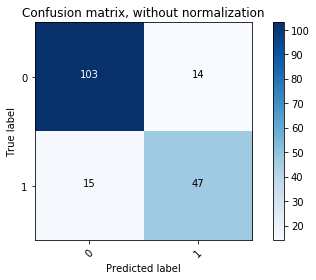

In [106]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names = ['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()



In [107]:
test_data = test_data.loc[:, test_data.columns != 'Name']
predictions = random_forest.predict(test_data.values)



In [92]:
type(predictions)



numpy.ndarray

In [108]:
pred_df = pd.DataFrame(
    predictions, index=test_data.index, columns=['Survived'])
pred_df



,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
897,0
898,0
899,0
900,1


In [109]:
pred_df.to_csv('NeuralNet.csv', header=True, sep=',')
# Confusion Matrix
# [[106  11]
#  [ 18  44]]

# True Negatives 106
# False Positives 11
# False Negatives 18
# True Positives 44
# False Positive rate 0.09401709401709402
# False Negative rate 0.2903225806451613 
